____________________________

# FIT5196-S2-2020 Assessment 3

___________________________


#### Student Name: Prajyot Nagrale
#### Student ID: 31132324

________________________________


Date: 20/11/2020

Version: 6.0

Environment: Python 3.8.5 and Jupyter notebook

________________________

## Libraries used: 

* **pandas** (Pandas is an open source package that provides many tools for data analysis. The package has several data structures that can be used for many data handling tasks. It has a method that can be raised for data analysis, included in Anaconda Python 3.8). Giving an alias name from pandas as pd.
* **numpy** (It is used to work with arrays. It can also be used with linear algebra, transform, and matrices. Included in Anaconda Python 3.8) Giving an alias name for numpy as np.
* **math** (It is a build in module that can use for mathematical tasks. It has set of methods and constants. Included in Anaconda Python 3.8) .
* **nltk.sentiment.vader** (SentimentAnalyzer is a tool to implement and facilitate sentiment analysis tasks using NLTK features and classifiers, for demonstrative purposes. Not included in Anaconda Python 3.8). Importing SentimentIntensityAnalyzer from nltk.sentiment.vader package.
* **sklearn.** (Linear Regression fits a linear model with coefficients to minimize the sum of squres between the observed targets in the dataset for the targets prediction. included in Anaconda Python 3.8). Importing LinearRegression from sklearn.linear_model.
* **matplotlib.pyplot** (It combines pyplot with numpy into one namespace. It is used to create different graph or visualize the data in proper format. Included in Anaconda Python 3.8). Giving as alias name for matplotlib.pyplot as plt.

* re
* radians, cos, sin, asin, sqrt 
* wrapper
* PyPDF2
* ast
* xmltodict
* zipfile
* json
* shapefile
* shapely.geometry import Point
* shapely.geometry.polygon import Polygon
* sklearn import preprocessing
* scipy import stats 
_____________________________

In [1]:
# Import
import pandas as pd
import numpy as np
import re
from math import radians, cos, sin, asin, sqrt # Importing radians, cos, sin, asin, sqrt from math packages
from tabula import wrapper
import PyPDF2
import ast
import xmltodict
import zipfile
import json
import shapefile
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from sklearn import preprocessing
from matplotlib import pyplot as plt
%matplotlib inline
from scipy import stats
import seaborn as sns 

# Read 

## Unzip

It is used to extract all the values from the zipped file.

In [2]:
# Extract zip file 
with zipfile.ZipFile("31132324.zip", 'r') as zip_ref:
    zip_ref.extractall("31132324")# Extract zip file 

with zipfile.ZipFile("GTFS_Melbourne_Train_Information.zip", 'r') as zip_ref:
    zip_ref.extractall("GTFS_Melbourne_Train_Information")# Extract zip file 

with zipfile.ZipFile("vic_suburb_boundary.zip", 'r') as zip_ref:
    zip_ref.extractall("vic_suburb_boundary")# Extract zip file 

### 1) PDF

In [3]:
# Read PDF files
with open('./31132324/hospitals.pdf','rb') as pdf:
    pdf_merger = PyPDF2.PdfFileReader(pdf) # read data
    number_page = pdf_merger.getNumPages() # no of pages

pdf_data = []
for each in range(0, number_page):
    pdf_data.append(wrapper.read_pdf('./31132324/hospitals.pdf', pages = each)) # from every pages

pdf_dat = pd.concat(pdf_data) # dataframe
cols = ['id', 'lat', 'lng', 'name']
df_pdf = pdf_dat[cols].reset_index() # resent index
df_pdf

,index,id,lat,lng,name
0,0,hospital_001,-37.990622,145.072836,Como Private Hospital
1,1,hospital_002,-37.855469,145.268183,Mountain District Private Hospital
2,2,hospital_003,-37.792230,144.889128,Western Hospital
3,3,hospital_004,-37.756042,145.061896,Mercy Hospital for Women
4,4,hospital_005,-37.760623,144.815624,Sunshine Hospital
...,...,...,...,...,...
238,43,hospital_189,-36.765338,144.266713,"St John of God Hospital, Bendigo"
239,44,hospital_190,-36.048446,145.203249,Nathalia District Hospital
240,45,hospital_191,-37.019006,145.138029,Seymour District Memorial Hospital
241,46,hospital_192,-37.854032,145.162993,Peter James Centre


### 2) JSON

In [4]:
df_json = pd.read_json('./31132324/real_state.json') # read json file
df_json

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space
0,48465,-37.817101,145.058548,441 Barkers Road (Entrance via rear laneway of...,8080000,house,2008,4,2,0
1,43318,-37.724899,145.100571,8 Willaura Place,8560000,house,2008,4,2,2
2,22971,-37.733128,144.954346,56 Fischer Street,6090000,house,2008,3,1,1
3,77306,-37.939733,145.109115,9 Loddon Court,6066000,house,2012,5,2,2
4,34488,-37.728284,145.019221,27 McColl Street,3384000,house,2010,2,1,2
...,...,...,...,...,...,...,...,...,...,...
1005,20435,-37.759301,144.972729,121 Mitchell Street,9712000,house,2011,2,1,1
1006,50025,-37.763408,145.090374,2/86 Latrobe Street,13720000,house,2011,4,2,2
1007,42247,-37.738944,145.064836,43 Ellesmere Parade,10880000,house,2014,2,1,0
1008,35413,-37.712612,145.019236,66 Whitelaw Street,8500000,house,2015,3,1,3


### 3) XML 

In [5]:
with open("./31132324/real_state.xml", "r") as xml_data:
    xml_data1 = ast.literal_eval(xml_data.read()) # read xml file

xml_data2 = xmltodict.parse(xml_data1) # parse xml file
data_dictionary = {}
data_dictionary['root'] = {} # create root in dictionar
parent_data = list(xml_data2['root'].keys()) # list in root 

for parent in parent_data:
    child_data = list(xml_data2['root'][parent].keys())[1:] # get from first
    data_dictionary['root'][parent] = {} 
    
    for child in child_data:
        data_dictionary['root'][parent][child] = xml_data2['root'][parent][child]['#text'] # add in empty dictionary

final_dictionary = {(k2):v2 for k1,v1 in data_dictionary.items() for k2,v2 in data_dictionary[k1].items()} # two for loop for getting all xml file 

df_xml = pd.DataFrame.from_dict(final_dictionary) # create dataframe
df_xml

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space
n47859,48394,-37.807036,145.053244,4 Downton Grove,15030000,house,2010,4,2,2
n85805,86340,-37.91543,145.000011,20 Lawrence Street,4740000,house,2016,5,2,2
n90747,91282,-37.980495,145.038626,149 Dalgetty Road,15820000,house,2010,4,2,2
n68757,69292,-37.849491,145.040852,70A Milton Parade,7028000,house,2013,4,2,2
n14166,14700,-37.759209999999996,144.896152,65 Fawkner Street,15730000,house,2015,4,3,2
...,...,...,...,...,...,...,...,...,...,...
n2637,2658,-37.81152725,144.8897705,101 Gamon Street,4290000,house,2006,2,1,0
n670,674,-37.801041,144.89216000000002,23 Windsor Street,9900000,house,2012,4,2,1
n81497,82032,-37.99674606,145.2403717,28 Fugosia Street,2784000,house,2006,2,1,0
n74090,74625,-37.900213,145.04918999999998,15 Melton Avenue,14080000,house,2012,4,2,2


### 4) html

In [6]:
with open('./31132324/shopingcenters.html') as html:
    df_html = pd.read_html(html)[0] # read html file

cols = ['sc_id', 'lat', 'lng']
df_html = pd.DataFrame(df_html[cols]) # dataframe
df_html

,sc_id,lat,lng
0,SC_001,-37.767915,145.041790
1,SC_002,-37.819375,145.171472
2,SC_003,-37.971131,145.089065
3,SC_004,-35.280406,149.132550
4,SC_005,-37.574572,144.920451
...,...,...,...
114,SC_115,-38.014916,145.323404
115,SC_116,43.105259,-76.091619
116,SC_117,-38.005454,145.217573
117,SC_118,-37.486265,144.589067


### 5) excel

In [7]:
df_excel = pd.read_excel('./31132324/supermarkets.xlsx') # read excel file
cols = ['id', 'lat', 'lng', 'type']
df_excel = pd.DataFrame(df_excel[cols])
df_excel

,id,lat,lng,type
0,S_001,-37.883978,144.735287,Woolworths
1,S_002,-41.161591,147.514797,Woolworths
2,S_003,-37.984078,145.077167,Woolworths
3,S_004,-37.707023,144.938740,Woolworths
4,S_005,-37.597670,144.938413,Woolworths
...,...,...,...,...
234,S_235,-37.860188,145.028920,Coles
235,S_236,-37.875984,144.614490,Coles
236,S_237,-37.047330,143.744610,Coles
237,S_238,-38.351648,144.922881,Coles


### 6) txt

In [8]:
# read txt file 
agency = pd.read_csv('./GTFS_Melbourne_Train_Information/1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/GTFS - Melbourne Train Information/agency.txt')
calendar = pd.read_csv('./GTFS_Melbourne_Train_Information/1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/GTFS - Melbourne Train Information/calendar.txt')
calendar_dates = pd.read_csv('./GTFS_Melbourne_Train_Information/1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/GTFS - Melbourne Train Information/calendar_dates.txt',)
routes = pd.read_csv('./GTFS_Melbourne_Train_Information/1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/GTFS - Melbourne Train Information/routes.txt')
shapes = pd.read_csv('./GTFS_Melbourne_Train_Information/1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/GTFS - Melbourne Train Information/shapes.txt')
stop_times = pd.read_csv('./GTFS_Melbourne_Train_Information/1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/GTFS - Melbourne Train Information/stop_times.txt')
stops = pd.read_csv('./GTFS_Melbourne_Train_Information/1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/GTFS - Melbourne Train Information/stops.txt')
trips = pd.read_csv('./GTFS_Melbourne_Train_Information/1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/GTFS - Melbourne Train Information/trips.txt')

## JOIN (JSON & XML)

In [9]:
# Join
df_json_xml = pd.concat([df_xml, df_json]) # join tables
df_json_xml = df_json_xml.reset_index()# resetting index
del df_json_xml['index'] # delete extra col

# Data Type
cols_numeric = ['property_id', 'lat', 'lng', 'price', 'year', 'bedrooms', 'bathrooms', 'parking_space']

for i in cols_numeric:
    df_json_xml[i] = pd.to_numeric(df_json_xml[i]) # changing datatype

## Create Columns

### Creating default columns

In [10]:
# Adding columns with default value
df_json_xml.insert(4,'suburb', 'not available')
df_json_xml.insert(11,'Shopping_center_id', 'not available')
df_json_xml.insert(12,'Distance_to_sc', 0)
df_json_xml.insert(13,'Train_station_id', 0)
df_json_xml.insert(14,'Distance_to_train_station', 0)
df_json_xml.insert(15,'travel_min_to_CBD', 0)
df_json_xml.insert(16,'Transfer_flag', '-1')
df_json_xml.insert(17,'Hospital_id', 'not available')
df_json_xml.insert(18,'Distance_to_hospital', 0)
df_json_xml.insert(19,'Supermarket_id', 'not available')
df_json_xml.insert(20,'Distance_to_supermarket', 0)

df_json_xml.head()

,property_id,lat,lng,addr_street,suburb,price,property_type,year,bedrooms,bathrooms,...,Shopping_center_id,Distance_to_sc,Train_station_id,Distance_to_train_station,travel_min_to_CBD,Transfer_flag,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermarket
0,48394,-37.807036,145.053244,4 Downton Grove,not available,15030000,house,2010,4,2,...,not available,0,0,0,0,-1,not available,0,not available,0
1,86340,-37.915430,145.000011,20 Lawrence Street,not available,4740000,house,2016,5,2,...,not available,0,0,0,0,-1,not available,0,not available,0
2,91282,-37.980495,145.038626,149 Dalgetty Road,not available,15820000,house,2010,4,2,...,not available,0,0,0,0,-1,not available,0,not available,0
3,69292,-37.849491,145.040852,70A Milton Parade,not available,7028000,house,2013,4,2,...,not available,0,0,0,0,-1,not available,0,not available,0
4,14700,-37.759210,144.896152,65 Fawkner Street,not available,15730000,house,2015,4,3,...,not available,0,0,0,0,-1,not available,0,not available,0


### 1) suburb

In [11]:
sf = shapefile.Reader('./vic_suburb_boundary/VIC_LOCALITY_POLYGON_shp.shp') # read shapefile
sf_records = sf.records() # get the records
sf_shapes = sf.shapes() # get the shape

sf_coordinates = []
# for loop for coordinates in shapefile
for index in range(0, len(sf_shapes)):
    sf_coordinates.append(sf_shapes[index].points) # getting the coordinates
# for loop for lat and long in datafile
final_coordinates = []
for index in range(0, len(df_json_xml)):
    # empty list
    temp = []
    # get the coordinates
    a1 = (df_json_xml.loc[index, 'lng']) #longitude of coordinate
    a2 = (df_json_xml.loc[index, 'lat'])# latitude of coordinate
    # add the data
    temp.append(a1)
    temp.append(a2)
    # tuple and add the data
    final_coordinates.append(tuple(temp)) # tuple the data
#empty list
suburb_data=[]
# for loop to match the coordinates
for index_1 in range(0, len(final_coordinates)):
    for index_2 in range(0, len(sf_coordinates)):
        # Check the point and polygon  of data
        point_data = Point(final_coordinates[index_1]) # Get the point 
        polygon_data = Polygon(sf_coordinates[index_2]) # Get all of the polygon in one point
        # add the data
        if (polygon_data.contains(point_data)):
            suburb_data.append(sf_records[index_2][6].title()) # add the polygon coordinates

df_json_xml['suburb'] = suburb_data

In [12]:
# suburb_data

### Haversine Distance Function

In [13]:
def distance(lat1, lat2, lon1, lon2): 

    # The math module contains a function named radians which converts from degrees to radians. 
    lon1 = radians(lon1) 
    lon2 = radians(lon2) 
    lat1 = radians(lat1) 
    lat2 = radians(lat2) 
    
    # Haversine formula  
    dlon = lon2 - lon1  
    dlat = lat2 - lat1 
    
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * asin(sqrt(a))  
    
    # Radius of earth in kilometers. Use 6378 for miles 
    r = 6378
    
    # calculate and return the result 
    return(c * r * 1000)

### 2) Shopping_center_id

### 3) Distance_to_sc


In [14]:
min_shopping_center_distance = []
min_shopping_center_id = []

for item_1, value_1 in enumerate(df_json_xml.loc[:,'lat']):

    all_dis = {}
    
    lat1 = df_json_xml.loc[item_1, 'lat']
    lon1 = df_json_xml.loc[item_1, 'lng']

    for item_2 , value_2 in enumerate(df_html.loc[:, 'sc_id']):

        lat2 = df_html.loc[item_2, 'lat']
        lon2 = df_html.loc[item_2, 'lng']
        dist_cal = round(distance(lat1, lat2, lon1, lon2), 3) # calculating the distance
        
        nam_dist_dict = {value_2: dist_cal}
        all_dis.update(nam_dist_dict)

    min_dist_id_sc = min(all_dis, key=all_dis.get) # Minimum value
    min_dist_sc = min(all_dis.values()) # Minimum value

    min_shopping_center_distance.append(min_dist_sc)
    min_shopping_center_id.append(min_dist_id_sc)

df_json_xml['Shopping_center_id'] = min_shopping_center_id
df_json_xml['Distance_to_sc'] = min_shopping_center_distance


### 4) Train_station_id, 
### 5) Distance_to_train_station

In [15]:
min_train_station_id = []
min_train_station_distance = []

for item_1, value_1 in enumerate(df_json_xml.loc[:,'lat']):
    
    all_dis = {}
    
    lat1 = df_json_xml.loc[item_1, 'lat']
    lon1 = df_json_xml.loc[item_1, 'lng']
    
    for item_2 , value_2 in enumerate(stops.loc[:, 'stop_id']):
        
        lat2 = stops.loc[item_2, 'stop_lat']
        lon2 = stops.loc[item_2, 'stop_lon']
        
        dist_cal = round(distance(lat1, lat2, lon1, lon2), 3) # calculating the distance
        
        nam_dist_dict = {value_2: dist_cal}
        all_dis.update(nam_dist_dict)
    
    min_dist_id_sc = min(all_dis, key=all_dis.get) # Minimum value
    min_dist_sc = min(all_dis.values()) # minimum value
    
    min_train_station_id.append(min_dist_id_sc)
    min_train_station_distance.append(min_dist_sc)

df_json_xml['Train_station_id'] = min_train_station_id
df_json_xml['Distance_to_train_station'] = min_train_station_distance


### 6) Hospital_id 
### 7) Distance_to_hospital

In [16]:
min_hospital_id = []
min_hospital_distance = []

for item_1, value_1 in enumerate(df_json_xml.loc[:,'lat']):
    
    all_dis = {}
    
    lat1 = df_json_xml.loc[item_1, 'lat']
    lon1 = df_json_xml.loc[item_1, 'lng']
    
    for item_2 , value_2 in enumerate(df_pdf.loc[:, 'id']):
        
        lat2 = df_pdf.loc[item_2, 'lat']
        lon2 = df_pdf.loc[item_2, 'lng']
        
        dist_cal = round(distance(lat1, lat2, lon1, lon2), 3) # calculating the distance
        
        nam_dist_dict = {value_2: dist_cal}
        all_dis.update(nam_dist_dict)
    
    min_dist_id_sc = min(all_dis, key=all_dis.get) # minimum value
    min_dist_sc = min(all_dis.values()) # minimum value
    
    min_hospital_id.append(min_dist_id_sc) 
    min_hospital_distance.append(min_dist_sc)

df_json_xml['Hospital_id'] = min_hospital_id
df_json_xml['Distance_to_hospital'] = min_hospital_distance


### 8) Supermarket_id
### 9) Distance_to_supermarket

In [17]:
min_supermarket_id = []
min_supermarket_distance = []

for item_1, value_1 in enumerate(df_json_xml.loc[:,'lat']):

    all_dis = {}
    
    lat1 = df_json_xml.loc[item_1, 'lat']
    lon1 = df_json_xml.loc[item_1, 'lng']

    for item_2 , value_2 in enumerate(df_excel.loc[:, 'id']):

        lat2 = df_excel.loc[item_2, 'lat']
        lon2 = df_excel.loc[item_2, 'lng']
        
        dist_cal = round(distance(lat1, lat2, lon1, lon2), 3) # calculating the distance
        
        nam_dist_dict = {value_2: dist_cal}
        all_dis.update(nam_dist_dict)

    min_dist_id_sc = min(all_dis, key=all_dis.get) # minimum vaule
    min_dist_sc = min(all_dis.values()) # minimum value

    min_supermarket_id.append(min_dist_id_sc)
    min_supermarket_distance.append(min_dist_sc)

df_json_xml['Supermarket_id'] = min_supermarket_id
df_json_xml['Distance_to_supermarket'] = min_supermarket_distance


### 10) train_min_to_CBD

In [18]:
# Join txt file
stops_stoptimes = pd.merge(stops, stop_times, on = 'stop_id', how = 'left')
stops_stoptimes_trips = pd.merge(stops_stoptimes, trips, on = 'trip_id', how = 'left')
# get the weekdays
cols = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday']
weekdays = calendar[(calendar[cols[0]] == 1) & (calendar[cols[1]] == 1) & (calendar[cols[2]] == 1) & (calendar[cols[3]] == 1) & (calendar[cols[4]] == 1)].reset_index(drop=True)
# join weekdays data
joined_all = pd.merge(stops_stoptimes_trips, weekdays['service_id'], on = 'service_id', how = 'inner')
# finders stop details
joined_finders = joined_all[(joined_all['stop_name'] == 'Flinders Street Railway Station')]
joined_finders = joined_finders.rename(columns = {'trip_id': 'f_trip_id', 'arrival_time': 'f_arrival_time', 'departure_time': 'f_dept_time'})
# function for time between 7-9
def func_dep(time):
    time_lt = time.split(":")
    hour = int(time_lt[0])
    min = int(time_lt[1])
    if (hour >= 7) and (hour <= 9):
        return 1
    else:
        return 0
# dataframe time between 7-9
joined_all['departure'] = joined_all.apply(lambda x:func_dep(x['departure_time']), axis=1)
joined_all = joined_all[joined_all['departure'] == 1]
# Join all the data
joined_all_df = pd.merge(joined_all, joined_finders[['f_trip_id', 'f_arrival_time', 'f_dept_time']], left_on = 'trip_id', right_on = 'f_trip_id', how = 'left')
joined_all_df['f_arrival_time'] = pd.to_datetime(joined_all_df['f_arrival_time'], errors='ignore')
joined_all_df['departure_time'] = pd.to_datetime(joined_all_df['departure_time'], errors='ignore')
# get the average
joined_all_df['travel_min_to_CBD'] = (joined_all_df['f_arrival_time'] - joined_all_df['departure_time']) / (np.timedelta64(1, 'm'))
joined_all_df = joined_all_df[joined_all_df['travel_min_to_CBD'] >= 0]
# group by average
avg_time = joined_all_df.groupby(['stop_id', 'stop_name', 'stop_lat','stop_lon'])['travel_min_to_CBD'].mean().round(2)
avg_time = avg_time.reset_index()
# add the average data to dataframe
for item, value in enumerate(df_json_xml.loc[:,'Train_station_id']):
    if value in list(avg_time['stop_id']):
        time = avg_time.loc[avg_time['stop_id'] == value]['travel_min_to_CBD'].values[0]
        df_json_xml.loc[item, 'travel_min_to_CBD'] = time

### 11) Transfer_flag

In [19]:
direct_train_id = [] 
# get finders street data
for i, j in enumerate(routes.loc[:, 'route_long_name']):
    name = str(j).split(' - ')
    if ((name[0] == 'City (Flinders Street)') | (name[1] == 'City (Flinders Street)')):
        direct_train_id.append(routes.loc[i, 'route_id'])
df_dt_id = pd.DataFrame(direct_train_id)  
# Join the data
join_df=pd.merge(df_dt_id,trips[['route_id', 'trip_id', 'service_id']], left_on=0, right_on='route_id',how='left')
join_df1=pd.merge(join_df,stop_times[['trip_id', 'stop_id', 'departure_time']], on='trip_id',how='left')
join_df2=pd.merge(join_df1,weekdays['service_id'],on='service_id',how='inner')
join_df2['Departure Time Indicator']=join_df2.apply(lambda x:func_dep(x['departure_time']),axis=1)
join_df3=join_df2[join_df2['Departure Time Indicator']==1]
# check if last stop is finders or not
for i, j in enumerate(df_json_xml.loc[:,'Train_station_id']):
    if j in list(join_df3['stop_id']):
        df_json_xml.loc[i, 'Transfer_flag'] = 0
    else:
        df_json_xml.loc[i, 'Transfer_flag'] = 1

### Remove duplicate

In [20]:
# deleting duplicates
df_json_xml = df_json_xml.drop_duplicates(subset='property_id')

## Write Data

In [21]:
# Output the file by using to_csv file
df_json_xml.to_csv('31132324_A3_solution.csv', index=False)

________________________


# Task 2

## Normalization/Transformation methods

Before starting the prediction of data, data needs to go through multiple methods. One of these methods is called normalization or transformation method. The data is called skewed when the curve appears disordered in a normal distribution. 
Raw data is always unfit for direct consumption for analysis or modelling. It is in concern when the data volume is huge. 

Normalisation is a process that involves changing numerical values into a new range using a mathematical function. It is a systematic approach for data preparation for machine learning.

Some of the Normalization/Transformation methods include:
Standardization, min-max normalization, log, power, box-cox transformation.

In [22]:
# Indepedent and dependent variables
train = df_json_xml[['Distance_to_sc',  'travel_min_to_CBD', 'Distance_to_hospital']]
target = df_json_xml[['price']]

<AxesSubplot:>

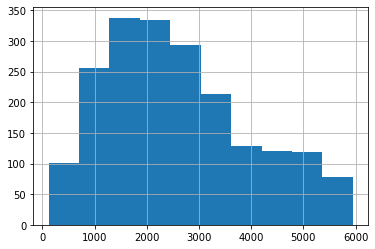

In [23]:
# Check skewness of data
train['Distance_to_sc'].hist()

<AxesSubplot:>

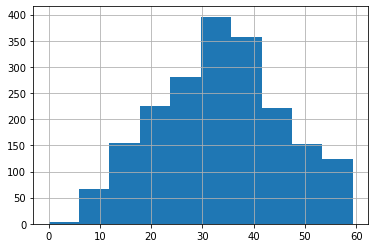

In [24]:
train['travel_min_to_CBD'].hist()

<AxesSubplot:>

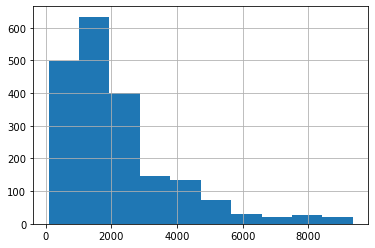

In [25]:
train['Distance_to_hospital'].hist()

From the above graphs we are able to see the skewness "Distance_to_sc", "travel_min_to_CBD" and "Distance_to_hospital". We are using these independent variables to predict the "Price" variable. We can see that all the independent variable are skewed. hist() is a function to plot the skewness of the data. 

 - Distance_to_sc - Most of the data lies between 1000 - 3000

 - travel_min_to_CBD - Most of the data lies between 20 - 40

 - Distance_to_hospital - Most of the data lies between 0 - 3000 
 
 To normalize the data for distribution, we can use the below methods.

### 1) Standardization: 

Standardization is a process of making the data set comparable with other data sets. It is used to transform the skewed data into a normal and understandable format. Z-Score Transformation is the technique used the transformation. The result of standardization will rescale the features to ensure the mean and the standard deviation to be 0 and 1. 

preprocessing.StandardScaler() - Standardize features by removing the mean and scaling to unit variance

fit() - Compute the mean and std to be used for later scaling.

transform() - Perform standardization by centring and scaling

In [26]:
stand_fit = preprocessing.StandardScaler().fit(train[["Distance_to_sc",  "travel_min_to_CBD", "Distance_to_hospital"]])
stand_transform = stand_fit.transform(train[["Distance_to_sc",  "travel_min_to_CBD", "Distance_to_hospital"]])
standard_df = pd.DataFrame(stand_transform, columns = ["Distance_to_sc",  "travel_min_to_CBD", "Distance_to_hospital"])

(<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>)

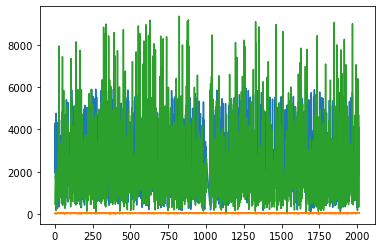

In [27]:
# Original data
train["Distance_to_sc"].plot(), train["travel_min_to_CBD"].plot(), train["Distance_to_hospital"].plot()

(<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>)

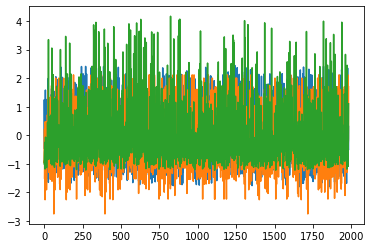

In [28]:
# Standarized Data
standard_df["Distance_to_sc"].plot(), standard_df["travel_min_to_CBD"].plot(), standard_df["Distance_to_hospital"].plot()

The techniques of standardization are to rescale features value with the distribution value between 0 and 1. We can see that the variance has been chanced after using the Standard Scaler. Mean was brought closer for the dependent variable. Now we can use this to better predict the data. 

In [29]:
print('Average : {:.2f}, {:.2f}, {:.2f}'.format(stand_transform[:,0].mean(), stand_transform[:,1].mean(),stand_transform[:,2].mean()))
print('Variation : {:.2f}, {:.2f}, {:.2f}'.format(stand_transform[:,0].std(), stand_transform[:,1].std(),stand_transform[:,2].std()))

Average : 0.00, -0.00, -0.00
Variation : 1.00, 1.00, 1.00


### 2) Min Max Normalization

It is one of the most common normalization transformation. The minimum value of the features get transformed into 0 and maximum value get transformed into 1. And every other value gets transformed into a decimal value between 0 and 1. One of the downside of min max normalization is that it doesn't handle outliers data. 

 - preprocessing.MinMaxScaler() - is used to do the transformation

In [30]:
# MinMax scaling
minmax_fit = preprocessing.MinMaxScaler().fit(train[['Distance_to_sc',  'travel_min_to_CBD', 'Distance_to_hospital']])
#Tranformation
minmax_trans = minmax_fit.transform(train[['Distance_to_sc',  'travel_min_to_CBD', 'Distance_to_hospital']])

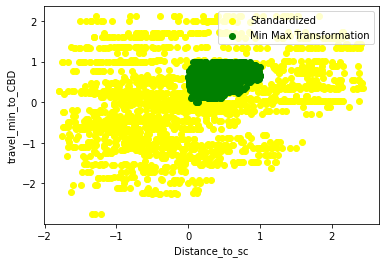

In [31]:
plt.scatter(stand_transform[:,0],  stand_transform[:,1], color='yellow', label='Standardized') 
plt.scatter(minmax_trans[:,0],  minmax_trans[:,1], color='green', label='Min Max Transformation')

plt.xlabel('Distance_to_sc')
plt.ylabel('travel_min_to_CBD')
plt.legend(loc = 'upper right')

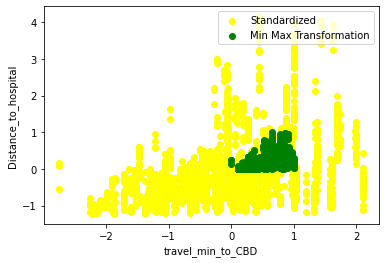

In [32]:
plt.scatter(stand_transform[:,1],  stand_transform[:,2], color='yellow', label='Standardized') 
plt.scatter(minmax_trans[:,1],  minmax_trans[:,2], color='green', label='Min Max Transformation')

plt.xlabel('travel_min_to_CBD')
plt.ylabel('Distance_to_hospital')
plt.legend(loc = 'upper right')

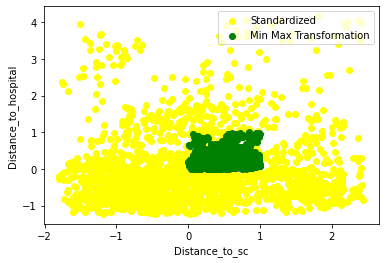

In [33]:
plt.scatter(stand_transform[:,0],  stand_transform[:,2], color='yellow', label='Standardized') 
plt.scatter(minmax_trans[:,0],  minmax_trans[:,2], color='green', label='Min Max Transformation')

plt.xlabel('Distance_to_sc')
plt.ylabel('Distance_to_hospital')
plt.legend(loc = 'upper right')

In [34]:
print('Minimum value : {:.2f}, {:.2f}, {:.2f}'.format(minmax_trans[:,0].min(),  minmax_trans[:,1].min(), minmax_trans[:,2].min()))
print('Maximum value : {:.2f}, {:.2f}, {:.2f}'.format(minmax_trans[:,0].max(),  minmax_trans[:,1].max(), minmax_trans[:,2].max()))

Minimum value : 0.00, 0.00, 0.00
Maximum value : 1.00, 1.00, 1.00


From the above graph, we can see that Min-Max scaling is an alternative approach to standardization. The data is scaled to a fixed range from 0 to 1. The cost Min-Max scaling comparing with standardization is that we can get a smaller standard deviation like in a graph. It is used to suppress the effect of outliers as well. 

### 3) Log Transformation:

Log transformation can be used to make highly skewed data into less skewed one. The is valuable for making patterns in the data and to predict the data depending upon the statistics. Log transformation helps to make transformation more visible. 

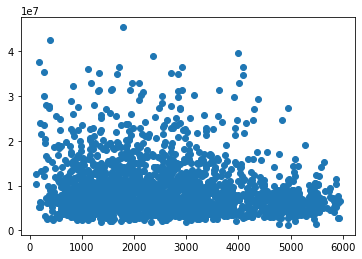

In [35]:
# Original data
plt.scatter(train.Distance_to_sc, target.price)

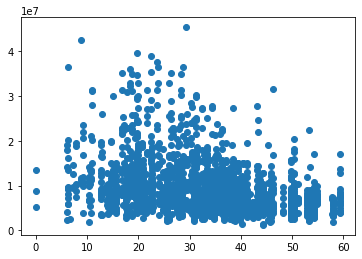

In [36]:
plt.scatter(train.travel_min_to_CBD, target.price)

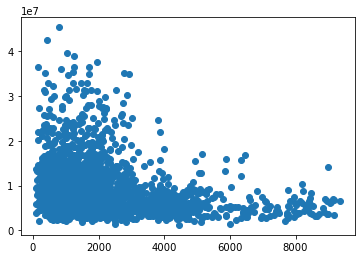

In [37]:
plt.scatter(train.Distance_to_hospital, target.price)

In [38]:
#log transformations
log_transform = train.apply(lambda x : np.log10(x), axis=1)
log_transform_1 = target.apply(lambda x : np.log10(x), axis=1)

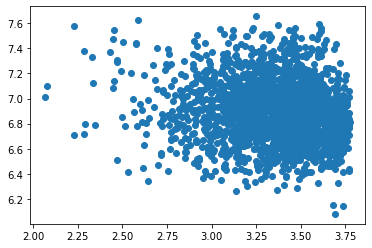

In [39]:
plt.scatter(log_transform.Distance_to_sc, log_transform_1.price)

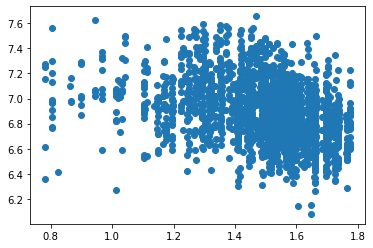

In [40]:
plt.scatter(log_transform.travel_min_to_CBD, log_transform_1.price)

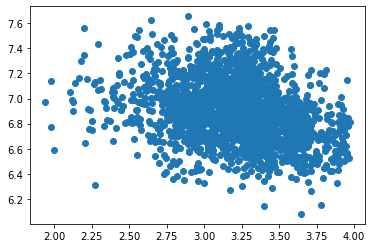

In [41]:
plt.scatter(log_transform.Distance_to_hospital, log_transform_1.price)

From the above graph, we can see the difference between the original correlation between the independent variable and dependent variable and the correlation after the transformation. The first three scatter plots are the correlation of original data. And the last three scatter plots are the correlation of the log transform data. 

Log Transformation makes the patterns more visible. The plots show that there is a strong relationship between these variables.

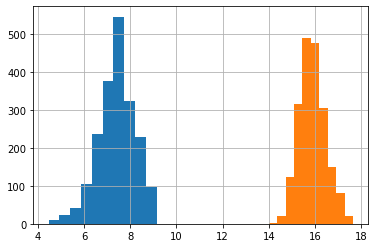

In [42]:
train['Distance_to_hospital'].apply(np.log).hist()
target['price'].apply(np.log).hist()
plt.show()

From the above graphs, we can see the uniqueness between the independent variables. Before using Log Transformation the clustering were not normally distributed. But after applying it, Data has been clustered together. 

### 4) Power Transformation

It is used to make the probability distribution of a variable more normal. This is used for removing the skewness in the distribution. It can be applied directly by calculating the log or square root of the variables. 

In [43]:
# power transformation
power_transform = train.apply(lambda x : np.power(x, 2), axis=1)
power_transform_1 = target.apply(lambda x : np.power(x, 2), axis=1)

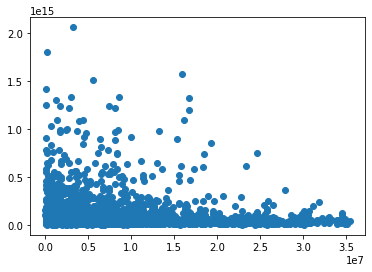

In [44]:
plt.scatter(power_transform.Distance_to_sc, power_transform_1.price)

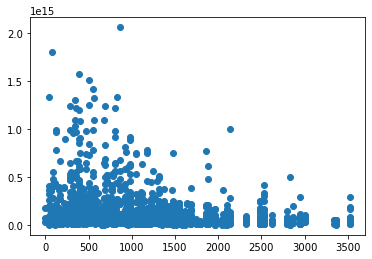

In [45]:
plt.scatter(power_transform.travel_min_to_CBD, power_transform_1.price)

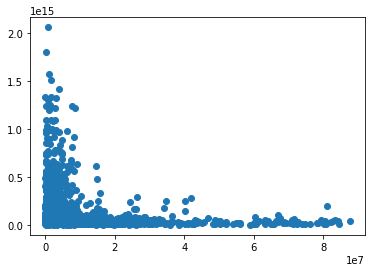

In [46]:
plt.scatter(power_transform.Distance_to_hospital, power_transform_1.price)

The data is more stabilized concerning the variation in data. From the above graphs, we can see that the power transformer made the data distribution more Gaussian and standardized. It created the mean value as 0 and the standard deviation as 1.

### 5) Box Cox Transformation:

It is a transformation of a non-normal dependent variable into a normal shape. It will select the best mathematical function for the data transformation. The main goal is to get a normal distribution of the transformed data and a constant variance.

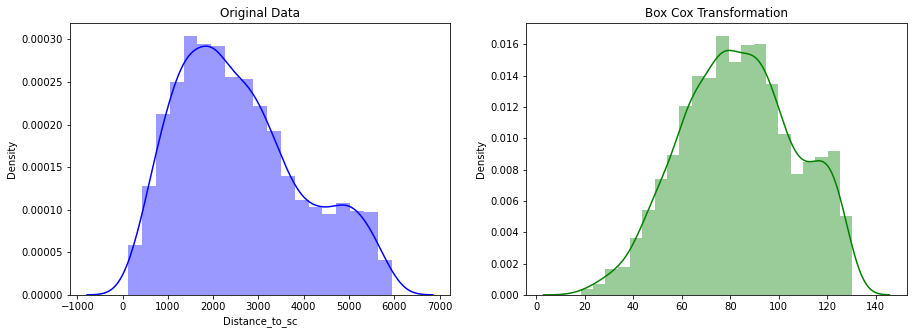

In [47]:
# Performing boxcox transformation
normalized_data_hosp = stats.boxcox(train["Distance_to_sc"])

fig, ax = plt.subplots(1,2)

# original data
sns.distplot(train["Distance_to_sc"], ax = ax[0], color = "blue")
ax[0].set_title("Original Data")

# Plotting transformed data after boxcox transformation
sns.distplot(normalized_data_hosp[0],ax=ax[1],color ="green")
ax[1].set_title("Box Cox Transformation")

# Setting scale
fig.set_figheight(5) 
fig.set_figwidth(15)

From the above graph we are able to see that the orginal data is little right skewed. Where as the box cox transformation has more normally distributed. It has also normalized the data to get better relation. 

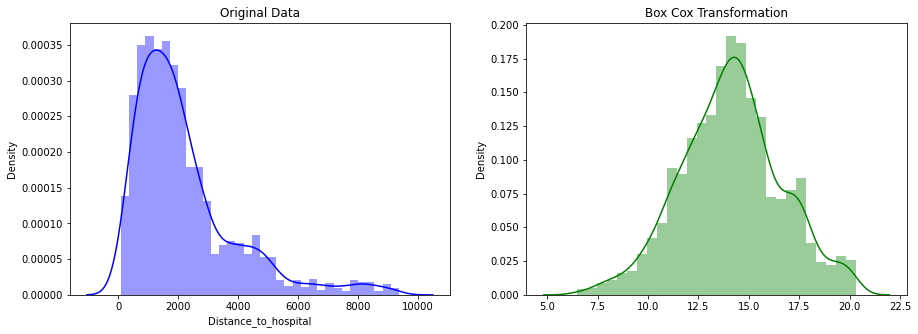

In [48]:
# Performing boxcox transformation
normalized_data_hosp = stats.boxcox(train["Distance_to_hospital"])

fig, ax = plt.subplots(1,2)

# original data
sns.distplot(train["Distance_to_hospital"], ax = ax[0], color = "blue")
ax[0].set_title("Original Data")

# Plotting transformed data after boxcox transformation
sns.distplot(normalized_data_hosp[0],ax=ax[1],color ="green")
ax[1].set_title("Box Cox Transformation")

# Setting scale
fig.set_figheight(5) 
fig.set_figwidth(15)

The first blue graph shows the distribution of the orginal data on predicted price. We can see that the graph is positive skewed. To better predict the data, we used box cox transformation on the original data. The green graph shows the distribtion of data after using box cox transformation. We can see that the box cox transformation data is normally distributed. It will help to better predict the independent variable and will give better accuracy. 

## Summary

This assessment measured the understanding of the basics of parsing text file using python programming language. As we were not allowed to use multiple libraries like pandas, I was able to understand the importance of the packages.
This assessment also helps to understand below topics:

- **Reading data**:
    As the data are in different format like, txt, json, xml, pdf and many more. I was able to understand how to read the file and use it for further processing.

- **Transformation**:
    Data Transformation is the process for detecting and correcting any normalization in the reset in the data. It is refer to indentify uneven features and then replace, modify or delete as per the normalized data.
    
- **Creating file**:
    In this assessment we have to create XML file. XML file require proper format to create the file. By doing this i was able to understand how to create and write a file with the formats required for creating different format file.